In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [65]:
df =  pd.read_csv("C:/Users/KahindiE/Documents/student-mat - student-mat.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [66]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [67]:
df.info() # 395 rows and 33 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [68]:
df.shape

(395, 33)

In [69]:
df.describe() # 395 rows and 33 columns

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [70]:
df.isnull().sum() # 0 null values

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [71]:
#duplicates
df.duplicated().sum()

0

In [72]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
390    False
391    False
392    False
393    False
394    False
Length: 395, dtype: bool

In [73]:
#1.select column Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9thgrade, 3 â€“ secondary education or 4 â€“ higher education)
df['Medu'] # 0, 1, 2, 3, 4


0      4
1      1
2      1
3      4
4      3
      ..
390    2
391    3
392    1
393    3
394    1
Name: Medu, Length: 395, dtype: int64

In [74]:
#2. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th  grade, 3 â€“ secondary education or 4 â€“ higher education)
df['Fedu'] # 0, 1, 2, 3, 4


0      4
1      1
2      1
3      2
4      3
      ..
390    2
391    1
392    1
393    2
394    1
Name: Fedu, Length: 395, dtype: int64

In [75]:
#3. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 
df['famrel'] # 1, 2, 3, 4, 5

0      4
1      5
2      4
3      3
4      4
      ..
390    5
391    2
392    5
393    4
394    3
Name: famrel, Length: 395, dtype: int64

In [76]:
#4. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
df['freetime'] 

0      3
1      3
2      3
3      2
4      3
      ..
390    5
391    4
392    5
393    4
394    2
Name: freetime, Length: 395, dtype: int64

In [77]:
#5. goout - going out with friends (numeric: from 1 - very low to 5 - very high) 
df['goout']

0      4
1      3
2      2
3      2
4      2
      ..
390    4
391    5
392    3
393    1
394    3
Name: goout, Length: 395, dtype: int64

In [78]:
#6. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
df['Dalc'] # 1, 2, 3, 4, 5

0      1
1      1
2      2
3      1
4      1
      ..
390    4
391    3
392    3
393    3
394    3
Name: Dalc, Length: 395, dtype: int64

In [79]:
#7. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 
df['Walc'] 

0      1
1      1
2      3
3      1
4      2
      ..
390    5
391    4
392    3
393    4
394    3
Name: Walc, Length: 395, dtype: int64

In [80]:
#8. health - current health status (numeric: from 1 - very bad to 5 - very good)
df['health'] # 1, 2, 3, 4, 5

0      3
1      3
2      3
3      5
4      5
      ..
390    4
391    2
392    3
393    5
394    5
Name: health, Length: 395, dtype: int64

In [81]:
#9. absences - number of school absences (numeric: from 0 to 93) 
df['absences']

0       6
1       4
2      10
3       2
4       4
       ..
390    11
391     3
392     3
393     0
394     5
Name: absences, Length: 395, dtype: int64

In [82]:
#10. G3 - final grade (numeric: from 0 to 20, output target) 
df['G3'] # 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [83]:
#handing missing values
df.isnull().sum() # 0 null values

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Text(0, 0.5, 'G3')

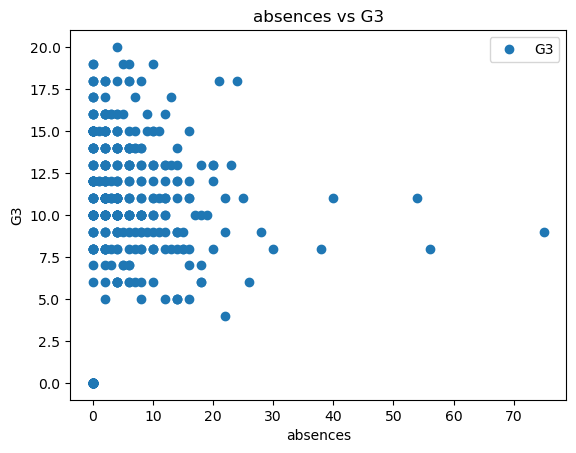

In [101]:
#scatter plot
df.plot(x='absences', y='G3', style='o')
plt.title('absences vs G3')
plt.xlabel('absences')
plt.ylabel('G3')




In [96]:
# Carry out multiple linear regression analysis to predict G3 - final grade (output target) based on the  independent variables 1 to 9. 
# 1. Select the independent variables (X) and the dependent variable (y)
import statsmodels.api as sm
X = df[['Medu', 'Fedu', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']] # independent variables
y = df['G3'] # dependent variable
X= sm.add_constant(X)  # adding a constant
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test

In [85]:
# 2. Create an instance of the LinearRegression model
model = sm.OLS(y, X).fit()  # Ordinary Least Squares
model.summary()  # Summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     3.870
Date:                Tue, 11 Jun 2024   Prob (F-statistic):           0.000103
Time:                        15:54:50   Log-Likelihood:                -1144.1
No. Observations:                 395   AIC:                             2308.
Df Residuals:                     385   BIC:                             2348.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4165      1.474      5.711      0.000       5.519      11.314
Medu           0.8619      0.266      3.245      0.001       0.340       1.384
Fedu           0.1454      0.264      0.551      0.582      -0.374       0.665
famrel         0.3428      0.257      1.333      0.183      -0.163       0.849
freetime       0.2583      0.241      1.073      0.284      -0.215       0.732
goout         -0.7661      0.231     -3.313      0.001      -1.221      -0.312
Dalc          -0.3383      0.335     -1.010      0.313      -0.997       0.320
Walc           0.2901      0.248      1.172      0.242      -0.197       0.777
health        -0.2187      0.164     -1.337      0.182      -0.540       0.103
absences       0.0123      0.029      0.431      0.667      -0.044       0.068
==============================================================================
Omnibus:                       33.339   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.306
Skew:                          -0.747   Prob(JB):                     2.92e-09
Kurtosis:                       3.393   Cond. No.                         77.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
# Evaluating the model
y_pred = model.predict(X_test) # Predicted values
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))
print('Adjusted R-squared:', 1 - (1-r2_score(y_test, y_pred))*(len(y)-1)/(len(y)-X.shape[1]-1))

Mean Squared Error: 19.402058229506007
Mean Absolute Error: 3.4955840535276566
Root Mean Squared Error: 4.404776751380938
R-squared: 0.11736865350403947
Adjusted R-squared: 0.09438346218904048


In [87]:
#define cleaned_df dataframe
cleaned_df = df[['Medu', 'Fedu', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']] # 9 independent variables
cleaned_df.head()

,Medu,Fedu,famrel,freetime,goout,Dalc,Walc,health,absences
0,4,4,4,3,4,1,1,3,6
1,1,1,5,3,3,1,1,3,4
2,1,1,4,3,2,2,3,3,10
3,4,2,3,2,2,1,1,5,2
4,3,3,4,3,2,1,2,5,4


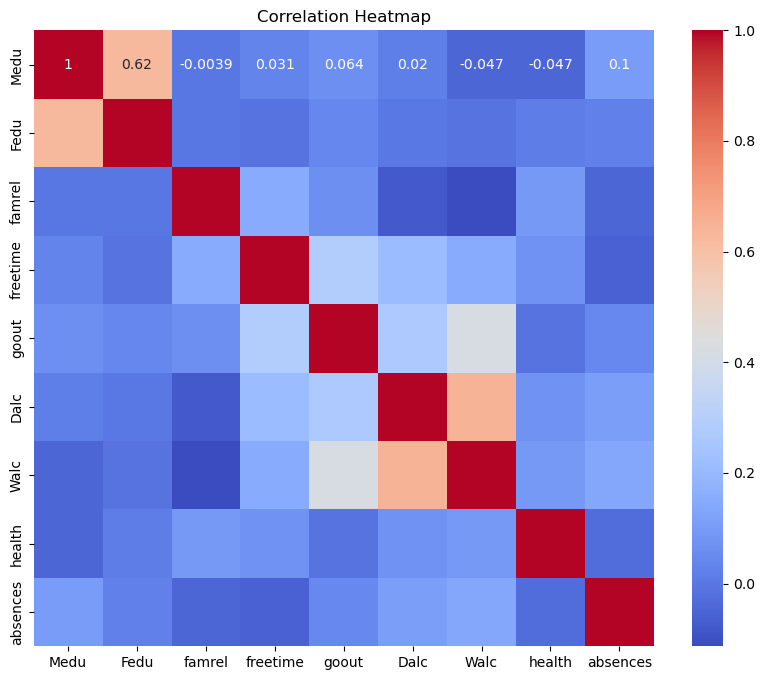

In [88]:
#vizualization with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cleaned_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

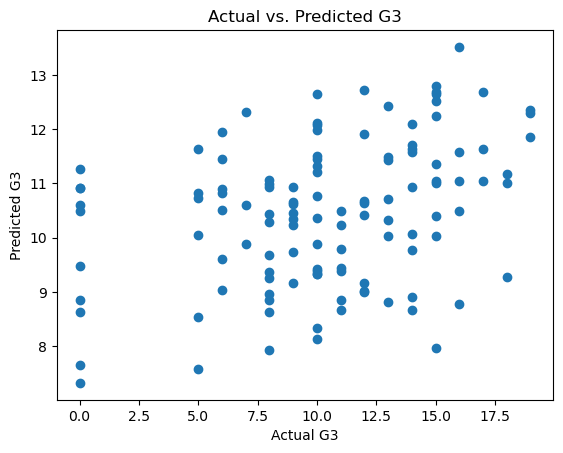

In [89]:
#Test whether all the multiple linear regression assumptions are met. 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Actual vs. Predicted G3')
plt.show()

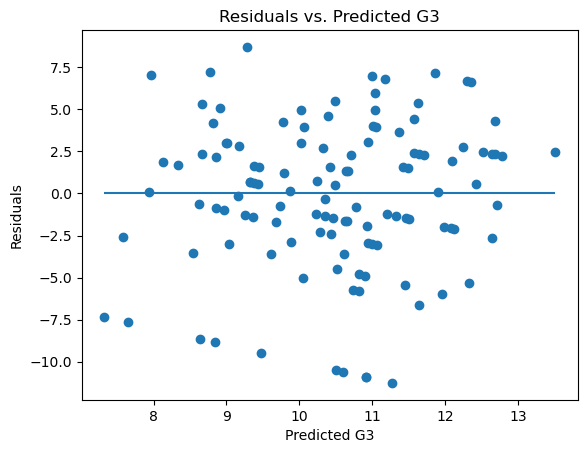

In [90]:
#2. Homoscedasticity
plt.scatter(y_pred, y_test - y_pred)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max())
plt.xlabel('Predicted G3')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted G3')
plt.show()

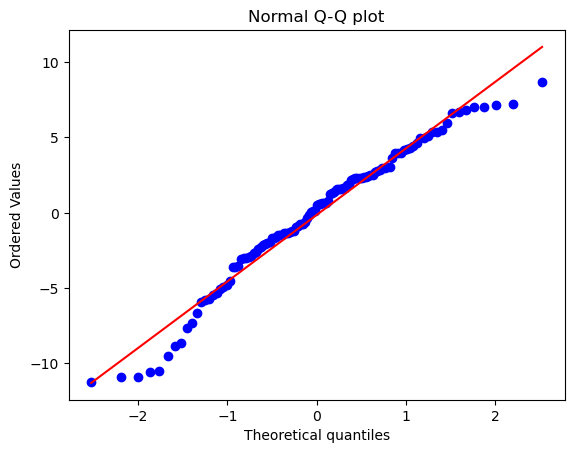

In [91]:
#3. Normality
import scipy.stats as stats  # Importing the stats module from the scipy library
residuals = y_test - y_pred  # Calculating the residuals
stats.probplot(residuals, dist="norm", plot=plt)  # Plotting the normal probability plot
plt.title("Normal Q-Q plot")
plt.show()

In [92]:
#4. Multicollinearity
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]  # Calculate VIF
pd.DataFrame({'VIF': vif}, index=X.columns)  # VIF values for each independent variable

,VIF
const,43.554418
Medu,1.691386
Fedu,1.651711
famrel,1.063832
freetime,1.156675
goout,1.325336
Dalc,1.778884
Walc,2.033048
health,1.034931
absences,1.044119
